In [2]:
from pandas import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#plt.style.use('ggplot')
#plt.style.use('ggplot')
%matplotlib inline

## Read Dataset 2: London Kensington  

Sulphur dioxide = Rikkidioksidi  
Nitric oxide = Typpioksidi  
Nitrogen dioxide = Typpidioksidi  
Ozone = Otsoni

In [3]:
df1h = read_csv('../data/AirQualityDataHourly.csv', header=4)
df1h = df1h.convert_objects(convert_numeric=True)
df1h['Date'] =  pd.to_datetime(df1h['Date'], format='%d-%m-%Y')
#df1h['time'] =  pd.to_datetime(df1h['time'], format='%H:%M')
idf = df1h.set_index(['Date','time'])

df15min = read_csv('../data/AirQualityData15Minutes.csv', header=4)
df15min = df15min.convert_objects(convert_numeric=True)
df15min['Date'] =  pd.to_datetime(df15min['Date'], format='%d-%m-%Y')
idf15min = df15min.set_index(['Date','time'])

/home/vagrant/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app
/home/vagrant/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


## Prepare data

One hour data

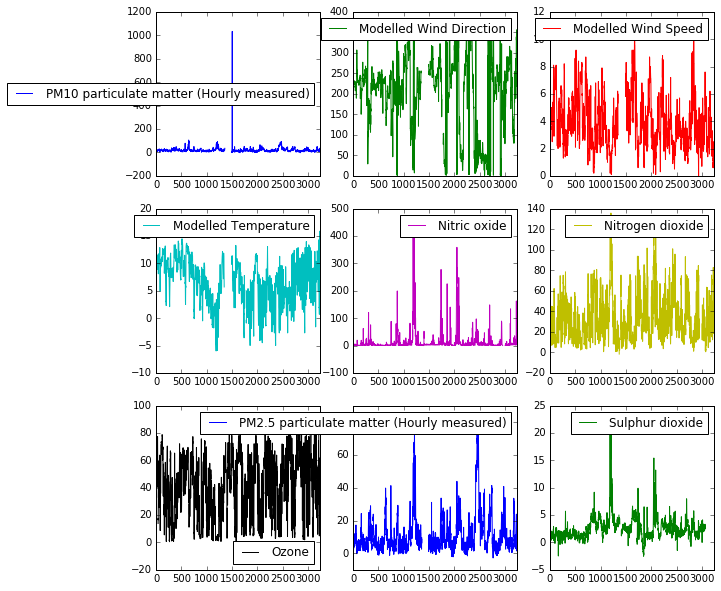

In [4]:
df1h.plot(subplots=True, layout=(3, 3), figsize=(10, 10), sharex=False);

In [5]:
df1h['PM10 particulate matter (Hourly measured)'].max()

1032.9000000000001

In [6]:
# Remove the row that has max PM10 value
df1h = df1h[df1h['PM10 particulate matter (Hourly measured)'] != 1032.9]

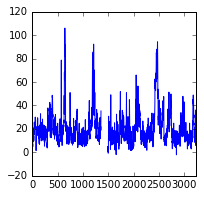

In [7]:
df1h['PM10 particulate matter (Hourly measured)'].plot(subplots=True, layout=(3, 3), figsize=(10, 10), sharex=False);

15 min data

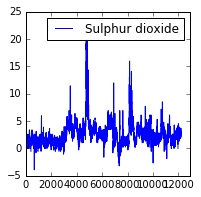

In [8]:
df15min.plot(subplots=True, layout=(3, 3), figsize=(10, 10), sharex=False);

## Data to bins

In [9]:
df1h.head(1)

,Date,time,PM10 particulate matter (Hourly measured),status/unit,Modelled Wind Direction,status/unit.1,Modelled Wind Speed,status/unit.2,Modelled Temperature,status/unit.3,Nitric oxide,status/unit.4,Nitrogen dioxide,status/unit.5,Ozone,status/unit.6,PM2.5 particulate matter (Hourly measured),status/unit.7,Sulphur dioxide,status/unit.8
0,2015-12-01,01:00,4.0,V ugm-3 (TEOM FDMS),NaN,NaN,NaN,NaN,NaN,NaN,1.48512,V ugm-3,27.98243,V ugm-3,33.86038,V ugm-3,6.1,V ugm-3 (TEOM FDMS),1.13266,V ugm-3


In [10]:
df15min.head(1)

,Date,time,Sulphur dioxide,status/unit
0,2015-12-01,00:15,1.04573,V ugm-3


In [21]:
# Place the data to bins according to air quality index
def qualityindex(df1,df2):
    group_names = [1,2,3,4,5,6,7,8,9,10]
    air_quality_index = df1[['Date','time']]
    #air_quality_index['Ozone'].fillna(1)
    
    # Ozone, Running 8 hourly mean. O3
    bins_O3 = [0,34,67,101,121,141,161,188,214,241,10000]
    air_quality_index['Ozone'] = pd.cut(df1['Ozone'], bins_O3, labels=group_names)
    
    # Nitrogen dioxide, Hourly mean. NO2
    bins_NO2 = [0,68,135,201,268,335,401,468,535,601,10000]
    air_quality_index['Nitrogen dioxide'] = pd.cut(df1['Nitrogen dioxide'], bins_NO2, labels=group_names)
    
    # Sulphur Dioxide, 15 minute mean. SO2
    #bins_SO2 = [0,89,178,267,355,444,533,711,888,1065,10000]
    #air_quality_index['Sulphur dioxide'] = pd.cut(df2['Sulphur dioxide'], bins_SO2, labels=group_names)
    
1    bins_PM25 = [0,12,24,36,42,48,54,59,65,71,10000]
    air_quality_index['PM2.5'] = pd.cut(df1['PM2.5 particulate matter (Hourly measured)'], bins_PM25, labels=group_names)
    
    # PM10 Particles, 24 hour mean. PM10
    bins_PM10 = [0,17,34,51,59,67,76,84,92,101,10000]
    air_quality_index['PM10'] = pd.cut(df1['PM10 particulate matter (Hourly measured)'], bins_PM10, labels=group_names)
    
    # Overall index is defined as the maximum value of the index
    #a = air_quality_index.convert_objects(convert_numeric=True)

    #air_quality_index = air_quality_index.replace(r'\s+', np.nan, regex=True)
    #air_quality_index.fillna(1, inplace=True)
    #air_quality_index['Max'] = air_quality_index.idxmax(axis=1)
    #print air_quality_index
    
    return air_quality_index

In [23]:
AQindex = qualityindex(df1h,df15min)
AQindex[['Ozone','Nitrogen dioxide']].fillna(1)
#AQindex.head()

/home/vagrant/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/vagrant/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/vagrant/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/s

,Ozone,Nitrogen dioxide
0,1,1
1,2,1
2,2,1
3,1,1
4,1,1
5,2,1
6,2,1
7,2,1
8,1,1
9,2,1


## Slice data to training and testing set

In [13]:
AQindex.head()
#pd.value_counts(AQindex['Ozone'])

,Date,time,Ozone,Nitrogen dioxide,PM2.5,PM10
0,2015-12-01,01:00,1,1,1,1
1,2015-12-01,02:00,2,1,1,1
2,2015-12-01,03:00,2,1,1,1
3,2015-12-01,04:00,1,1,1,1
4,2015-12-01,05:00,1,1,1,1


In [14]:
#AQindex['Date'] =  pd.to_datetime(AQindex['Date'], format='%d-%m-%Y')
#AQindex = AQindex.set_index(['Date','time'])
train = AQindex.loc['2015-12-01':'2016-02-29']
test = AQindex.loc['2016-03-01':'2016-03-31']